# **House Price Prediction Using Regression Analysis**

## **Aim of the Project**

To develop and evaluate regression models that accurately predict residential house prices using real-world property data.

## **Link to the dataset**

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## **Problem Definition**

Predict the SalePrice of a house based on its physical characteristics, location, quality, age, and other applicable features.
This is a supervised regression task.

Note: Target feature = SalePrice


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Understanding and Preprocessing**

•	Load and inspect the dataset

•	Identify feature types

•	Examine missing values


In [2]:
# Load the datasets

train = pd.read_csv("train.csv")      # used for model development and validation
test = pd.read_csv("test.csv")        # used only for final prediction

# inspecting the data
print(train.shape)
print(test.shape)

train.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# identifying feature types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# identify numerical and categorical features
num_feat = train.select_dtypes(include = ["int64", "float64"]).columns
cat_feat = train.select_dtypes(include = ["object"]).columns

print("Numerical Columns:", len(num_feat))
print("Categorical Columns:", len(cat_feat))

Numerical Columns: 38
Categorical Columns: 43


There are 38 numerical columns and 43 categroical columns

In [5]:
# examine missing values
missing_vals = train.isnull().sum().sort_values(ascending=False)
missing_vals[missing_vals > 0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


Not all here refers to missing values. Most might refer to missing features

## **Exploratory Data Analysis**

• Analyze SalePrice distribution

• Study correlation between features and price

• Compare prices across neighborhoods

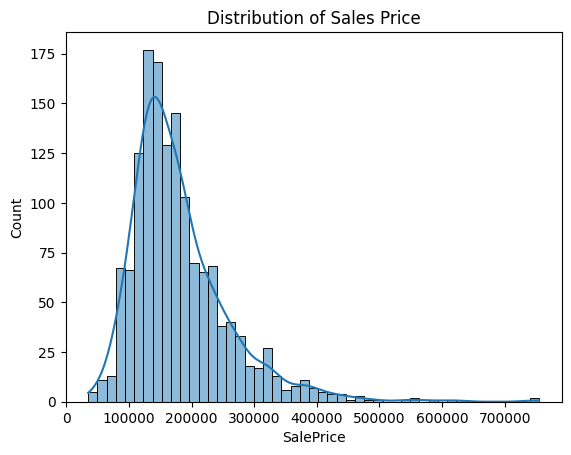

In [6]:
# salesprice distribution
sns.histplot(train["SalePrice"], kde = True)
plt.title("Distribution of Sales Price")
plt.show()

The histogram is right-skewed, a few high-value houses pull the distribution to the right.

This shows extreme outliers.

We need to reduce skewness for our intended model to work. Therefore, we'll apply log transformation to the SalePrice, which will reduce the effect of the outliers.

log function: np.log(). The function works only for positive numbers. In a case where we have negative numbers or zeros, we add a constant (usually 1) to all datapoints before transformation, so it becomes np.log1p()

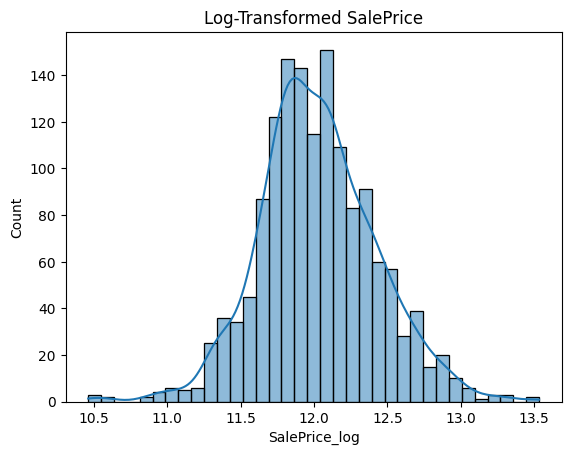

In [7]:
# apply the log function(np.log) to the salesprice
train["SalePrice_log"] = np.log1p(train["SalePrice"])

# check distribution after applying log transformation
sns.histplot(train["SalePrice_log"], kde = True)
plt.title("Log-Transformed SalePrice")
plt.show()

Now we have a saleprice that is normally distributed.

In [12]:
# correlation between features and price
# using df.corr(): s python method that computes pairwise correlation between features in a df
# here, df = train

corr = train.corr(numeric_only = True)[["SalePrice"]].sort_values(by = "SalePrice", ascending = False)
corr

,SalePrice
SalePrice,1.000000
SalePrice_log,0.948374
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723


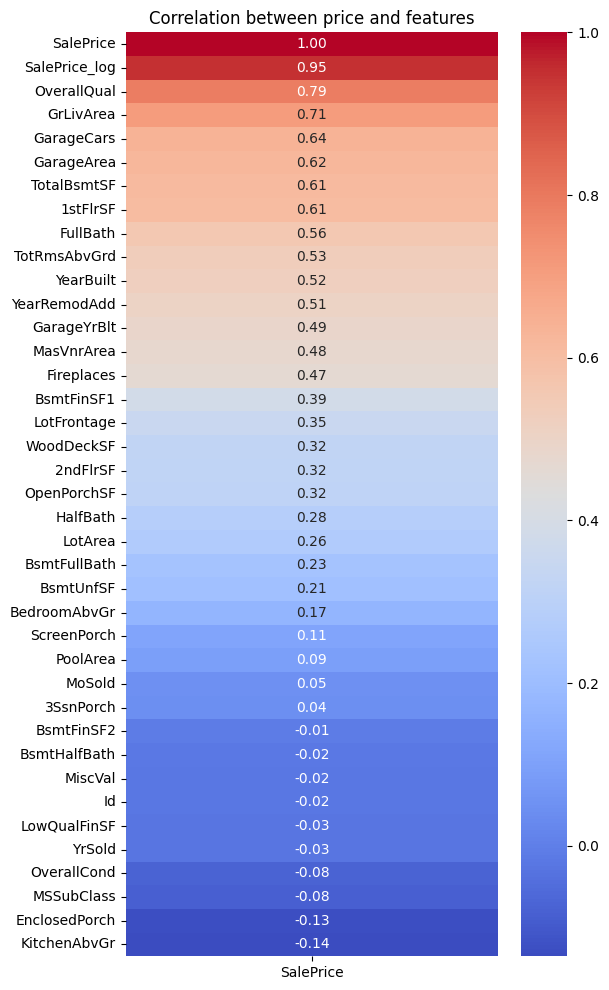

In [14]:
# visual of correlation
plt.figure(figsize = (6,12))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation between price and features")
plt.show()